In [66]:
#Assignment 2

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import sklearn 


#Lê o arquivo CSV hcc_dataset.csv com a vírgula como delimitador e armazena os dados num DataFrame: df.
df = pd.read_csv("hcc_dataset.csv", sep=",")

df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


In [68]:
# Obtém o número de Características e Dados
num_caracteristicas = df.shape[1]
num_dados = df.shape[0] 

print(f"Número de Características: {num_caracteristicas}")
print(f"Número de Dados: {num_dados}\n")

Número de Características: 50
Número de Dados: 165


In [69]:
#Obtem a lista de Características analisadas (colunas do df) 
print("Lista de Características analisadas:")
lista_colunas = []
for coluna in df.columns:
    lista_colunas.append(coluna)
print(lista_colunas)

Lista de Características analisadas:
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']


In [70]:
#Cria um dicionário vazio para guardar o número de valores ausentes (representados por '?') para cada coluna do DataFrame.
valores_ausentes_por_coluna = {}

# Iterar sobre as colunas
for coluna in df.columns:
    # Inicializar contador para esta coluna
    count = 0
    # Iterar sobre os valores da coluna
    for valor in df[coluna]:
        # Se o valor for '?', incrementar o contador
        if valor == '?':
            count += 1
    # Adicionar o contador ao dicionário
    valores_ausentes_por_coluna[coluna] = count

# Mostrar o resultado
print("Valores Ausentes por Característica:")
for coluna, count in valores_ausentes_por_coluna.items():
    print(f"{coluna}: {count}")

Valores Ausentes por Característica:
Gender: 0
Symptoms: 18
Alcohol: 0
HBsAg: 17
HBeAg: 39
HBcAb: 24
HCVAb: 9
Cirrhosis: 0
Endemic: 39
Smoking: 41
Diabetes: 3
Obesity: 10
Hemochro: 23
AHT: 3
CRI: 2
HIV: 14
NASH: 22
Varices: 52
Spleno: 15
PHT: 11
PVT: 3
Metastasis: 4
Hallmark: 2
Age: 0
Grams_day: 48
Packs_year: 53
PS: 0
Encephalopathy: 1
Ascites: 2
INR: 4
AFP: 8
Hemoglobin: 3
MCV: 3
Leucocytes: 3
Platelets: 3
 Albumin: 6
Total_Bil: 5
ALT: 4
AST: 3
GGT: 3
ALP: 3
TP: 11
Creatinine: 7
Nodules: 2
Major_Dim: 20
Dir_Bil: 44
Iron: 79
Sat: 80
Ferritin: 80
Class: 0


In [71]:
# Abre o arquivo CSV original para leitura
with open('hcc_dataset.csv', 'r') as infile:
    reader = csv.reader(infile)
    rows = list(reader) #Lê todas as linhas do arquivo e armazena-as no arquivo

# Abre um novo arquivo CSV para escrita
with open('hcc_dataset_modified.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)

    # Percorre cada linha do arquivo original
    for row in rows:
        #Inicializa uma nova linha para armazenar os valores modificados
        new_row = []
        # Percorre cada valor na linha original
        for value in row:
            #Substitui '?' por 'NaN'
            if value == '?':
                new_row.append('NaN')
            #Substui 'None' por 'Non' 
            elif value == 'None':
                new_row.append('Non') #tivemos de o fazer senão a substituição dos '?' por 'NaN' era mal feita 
            else:
                new_row.append(value) # Mantém o valor original se não precisar de substituição
        writer.writerow(new_row) # Escreve a nova linha modificada no arquivo de saída

data= pd.read_csv("hcc_dataset_modified.csv") # Lê o novo arquivo CSV modificado em um DataFrame do Pandas
data

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


In [72]:
# Calcula os tipos de dados de cada variável
tipos = data.dtypes

# Calcula o número de valores NaN em cada coluna
num_nan = data.isna().sum()

# Calcula a percentagem de valores NaN, em relação ao total, em cada coluna
percentagem_nan = (num_nan / len(data)) * 100
percentagem_nan_formatada = percentagem_nan.apply(lambda x: f"{x:.2f}%") #percentagem formatada com 2 casas decimais

# Cria um DataFrame para armazenar as estatísticas
tabela_estatisticas = pd.DataFrame({
    'Tipo': tipos,
    'Média/Moda': '-', # Inicializa com '-' para preencher posteriormente 
    'Desvio_Padrão (%)': '-',
    'Máximo': '-',
    'Mínimo': '-',
    'NaN': num_nan,
    'NaN (%)': percentagem_nan_formatada
})

#Seleciona as colunas numéricas do df
colunas_numericas = data.select_dtypes(include=[np.number]).columns
# Calcula a média, desvio padrão, máximo e mínimo para colunas numéricas
for coluna in colunas_numericas:
    media = data[coluna].mean()
    desvio_padrao = data[coluna].std()
    maximo = data[coluna].max()
    minimo = data[coluna].min()
    # Atualiza a média (inicialmente inicializada com '-') no DataFrame de estatísticas
    if not np.isnan(media):
        tabela_estatisticas.at[coluna, 'Média/Moda'] = f"{media:.2f}"
    # Atualiza o desvio padrão no DataFrame de estatísticas
    if not np.isnan(desvio_padrao):
        tabela_estatisticas.at[coluna, 'Desvio_Padrão (%)'] = f"{(desvio_padrao / media) * 100:.2f}%"
    # Atualiza o valor máximo no DataFrame de estatísticas
    if not np.isnan(maximo):
        tabela_estatisticas.at[coluna, 'Máximo'] = f"{maximo:.2f}"
    # Atualiza o valor mínimo no DataFrame de estatísticas
    if not np.isnan(minimo):
        tabela_estatisticas.at[coluna, 'Mínimo'] = f"{minimo:.2f}"
        
# Seleciona as colunas categórias do DataFrame
colunas_categoricas = data.select_dtypes(include=['object']).columns
# Calcula a moda para colunas categóricas
for coluna in colunas_categoricas:
    if coluna in tabela_estatisticas.index:
        moda = data[coluna].mode().iloc[0]  # obtém a moda da coluna 'coluna' do DataFrame 'data' e seleciona o primeiro valor dessa moda.
        tabela_estatisticas.at[coluna, 'Média/Moda'] = moda



# Formata a tabela para centralizar o conteúdo das células e o cabeçalho
#tabela_estatisticas_estilizada = tabela_estatisticas.style.set_properties(**{'text-align': 'center'}) \
#    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Exibe a tabela de estatísticas
#tabela_estatisticas_estilizada



tabela_estatisticas_formatada = pd.DataFrame()

for coluna in tabela_estatisticas.columns:
    # Adiciona a coluna ao DataFrame formatado
    tabela_estatisticas_formatada[coluna] = tabela_estatisticas[coluna].apply(lambda x: f"{x:.2f}" if isinstance(x, float) else x)

tabela_estatisticas_formatada

,Tipo,Média/Moda,Desvio_Padrão (%),Máximo,Mínimo,NaN,NaN (%)
Gender,object,Male,-,-,-,0,0.00%
Symptoms,object,Yes,-,-,-,18,10.91%
Alcohol,object,Yes,-,-,-,0,0.00%
HBsAg,object,No,-,-,-,17,10.30%
HBeAg,object,No,-,-,-,39,23.64%
HBcAb,object,No,-,-,-,24,14.55%
HCVAb,object,No,-,-,-,9,5.45%
Cirrhosis,object,Yes,-,-,-,0,0.00%
Endemic,object,No,-,-,-,39,23.64%
Smoking,object,Yes,-,-,-,41,24.85%


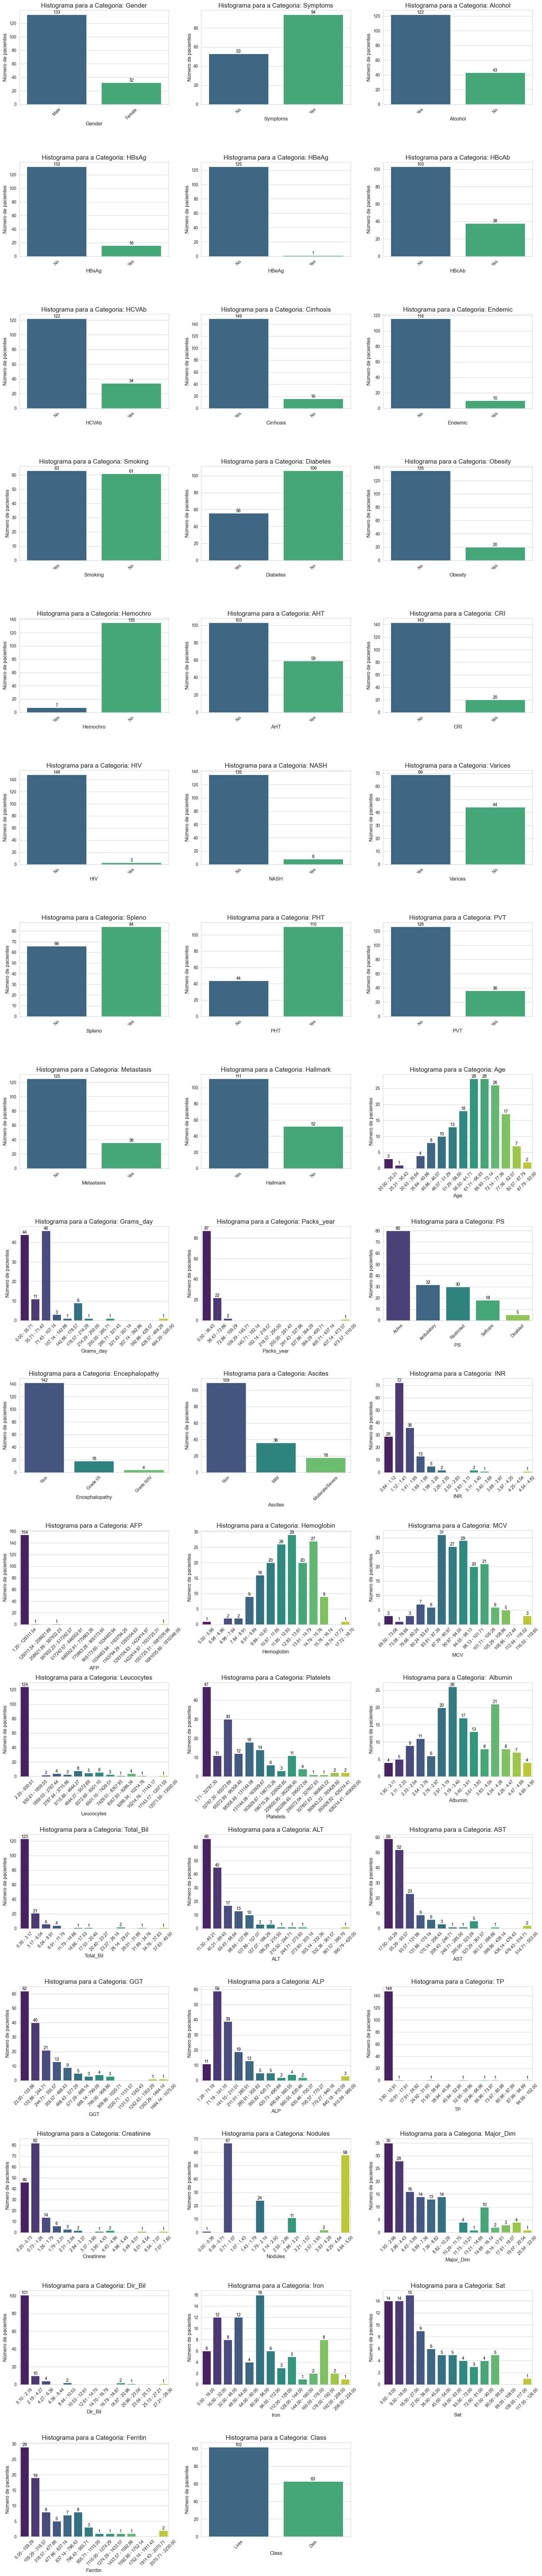

In [73]:
# Define o estilo do seaborn para os gráficos 
sns.set_style("whitegrid")

# Obtem a lista de colunas do DataFrame
lista_colunas = data.columns

# Define o número de colunas para o layout dos subplots
num_cols = 3
num_rows = int(np.ceil(len(lista_colunas) / num_cols)) # Calcula o número de linhas necessárias com base na quantidade de colunas

#Cria uma grelha de subplots com o tamanho especificado
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))

# Transforma o array de eixos  numa lista para facilitar a iteração
axes = axes.flatten()

# Itera sobre cada coluna na lista de colunas
for i, coluna in enumerate(lista_colunas):
    ax = axes[i] #Seleciona o subplot atual
    
    # Verifica se a coluna é do tipo categórico (texto)
    if data[coluna].dtype == 'object':
        # Cria um gráfico de barras para colunas categóricas
        # Cria um gráfico de barras para colunas categóricas
        sns.countplot(x=coluna, data=data, palette="viridis", hue=coluna, dodge=False, ax=ax, legend=False)
        # Define o título e rótulos do gráfico
        ax.set_title(f'Histograma para a Categoria: {coluna}', fontsize=15)
        ax.set_xlabel(coluna, fontsize=12)
        ax.set_ylabel('Número de pacientes', fontsize=12)
        # Rotaciona os rótulos do eixo x para melhor visualização
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        
        # Adiciona a contagem acima das barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')
    else:
       # Se a coluna for numérica, cria intervalos e agrupa os valores
        valores_min = data[coluna].min()
        valores_max = data[coluna].max()
        intervalos = np.linspace(valores_min, valores_max, num=15)
        
        # Agrupa os valores numéricos em intervalos
        data[coluna+'_intervalo'] = pd.cut(data[coluna], bins=intervalos, include_lowest=True)
        
        # Cria o histograma com os valores agrupados
        sns.countplot(x=coluna+'_intervalo', data=data, palette="viridis", hue=coluna+'_intervalo', dodge=False, ax=ax, legend=False)
       # Define o título e rótulos do gráfico
        ax.set_title(f'Histograma para a Categoria: {coluna}', fontsize=15)
        ax.set_xlabel(coluna, fontsize=12)
        ax.set_ylabel('Número de pacientes', fontsize=12)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        
        # Renomeia os rótulos do eixo x com os intervalos
        labels = [f'{intervalos[j]:.2f} - {intervalos[j+1]:.2f}' for j in range(len(intervalos)-1)]
        ax.set_xticks(range(len(labels)))  # Define os ticks
        ax.set_xticklabels(labels)  # Define os rótulos dos ticks
        
        # Adiciona a contagem acima das barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')

# Identifica as colunas de intervalos temporárias que foram adicionadas
colunas_para_remover = [coluna for coluna in data.columns if coluna.endswith('_intervalo')]

# Remove as colunas de intervalos do DataFrame
data = data.drop(columns=colunas_para_remover)
# Lista as colunas restantes no DataFrame após a remoção
colunas_restantes = data.columns.tolist()

# Remove subplots vazios
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout() #para evitar sobreposições
plt.show() #exibe os histogramas

/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/2484018241.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['Class'] = data2['Class'].replace({'Lives': 1, 'Dies': 0})
/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/2484018241.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace({'Male' : 0, 'Female' : 1})


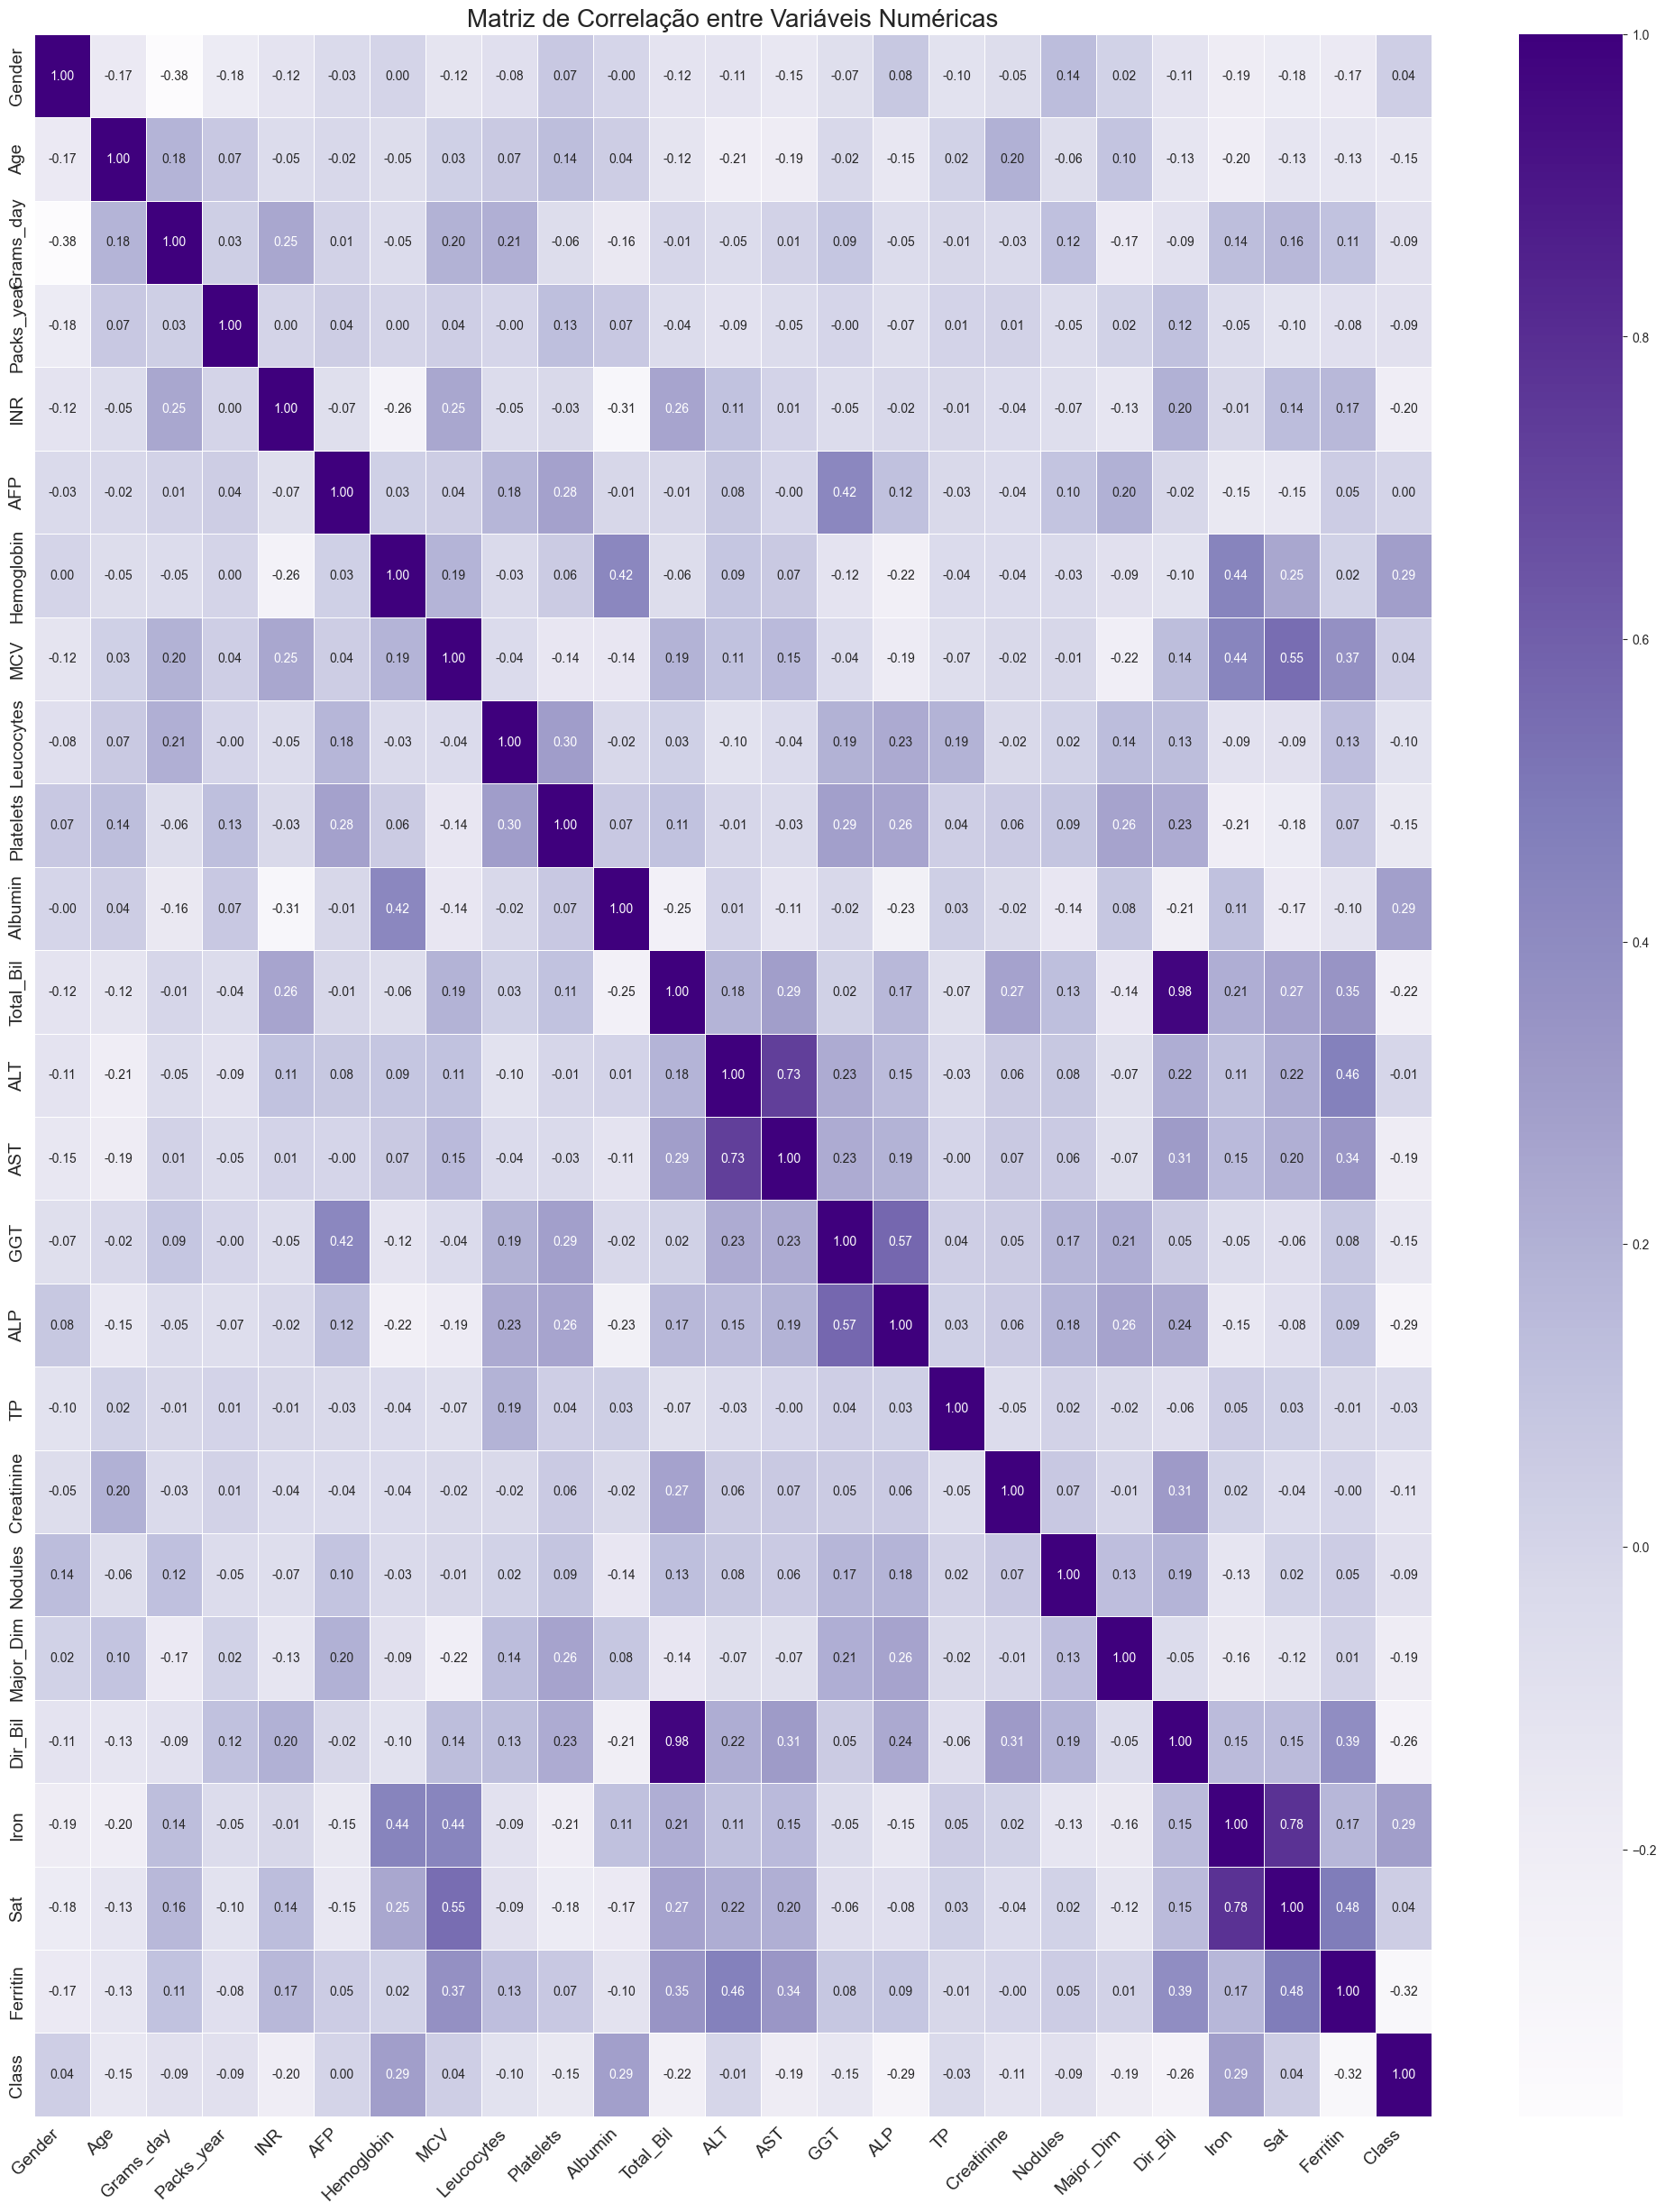

In [74]:
# Matriz de Correlação
# Cria uma cópia do DataFrame original
data2 = data.copy()

# Substitui os valores 'Lives' por 1 e 'Dies' por 0 na coluna 'Class'
data2['Class'] = data2['Class'].replace({'Lives': 1, 'Dies': 0})

# Substitui os valores 'Yes' por 1 e 'No' por 0 em todas as colunas do DataFrame
data2 = data2.replace({'Yes': f'{1:.0f}', 'No': f'{0:.0f}'}) 
data2 = data2.replace({'Male' : 0, 'Female' : 1})

data2 = data2.infer_objects(copy=False)

# Calcula a matriz de correlação para colunas numéricas
matriz_correlacao = data2.select_dtypes(include=np.number).corr()

# Visualiza a matriz de correlação usando seaborn com a paleta de cores "Purples"
plt.figure(figsize=(25, 30))
sns.heatmap(matriz_correlacao, annot=True, cmap='Purples', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [75]:
# Cria uma cópia do DataFrame original
data2 = data.copy()

# Substitui os valores 'Lives' por 1 e 'Dies' por 0 na coluna 'Class'
data2['Class'] = data2['Class'].replace({'Lives': 1, 'Dies': 0})

# Substitui os valores 'Yes' por 1 e 'No' por 0 em todas as colunas do DataFrame (tivemos de fazer desta forma porque senão a substuituição não estava a ser bem feita)
data2 = data2.replace({'Yes': f'{1:.0f}', 'No': f'{0:.0f}'})
data2=data2.replace({'Male': 0, 'Female': 1}) #substitui os valores 'Male' por 0 e 'Female' por 1

data2

/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/2282990574.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['Class'] = data2['Class'].replace({'Lives': 1, 'Dies': 0})
/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/2282990574.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2=data2.replace({'Male': 0, 'Female': 1}) #substitui os valores 'Male' por 0 e 'Female' por 1


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,1,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,0,0,1,1,0,1,0,1,0,1,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,0,1,1,0,0,0,0,1,0,1,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,0,1,1,1,0,1,0,1,0,1,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,NaN,NaN,NaN,1,1,0,1,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,1,1,0,NaN,NaN,NaN,NaN,1,0,0,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,0,0,1,0,0,0,0,1,0,1,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,0,0,1,1,0,1,1,1,1,1,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


In [76]:
# Extrai a coluna de correlação da característica 'Class' da matriz de correlação
correlacoes_com_class = matriz_correlacao['Class'].copy()

# Remove a correlação da coluna 'Class' com ela mesma
correlacoes_com_class = correlacoes_com_class.drop(labels=['Class'])

# Ordena as correlações absolutas de forma decrescente, para uma melhor visualização 
correlacoes_com_class = correlacoes_com_class.abs().sort_values(ascending=False)

# Exibe as correlações das variáveis com a variável com 'Class'
print("Variáveis mais correlacionadas com 'Class':")
print(correlacoes_com_class)

Variáveis mais correlacionadas com 'Class':
Ferritin      0.321489
ALP           0.293873
Hemoglobin    0.292357
Iron          0.291406
 Albumin      0.287799
Dir_Bil       0.264903
Total_Bil     0.223961
INR           0.202348
Major_Dim     0.193681
AST           0.190614
Platelets     0.150911
GGT           0.148655
Age           0.146054
Creatinine    0.108708
Leucocytes    0.102192
Packs_year    0.089814
Nodules       0.088705
Grams_day     0.086573
Sat           0.043110
MCV           0.042074
Gender        0.038435
TP            0.029274
ALT           0.006058
AFP           0.001972
Name: Class, dtype: float64


In [77]:
# Remoção de Características Redundantes
# Define as colunas que se vai remover(feito com base na menor correlação)
colunas_para_remover = ['Packs_year', 'Nodules', 'CRI', 'Smoking', 'AHT', 'NASH', 'Varices', 'HBcAb', 'Hemochro', 'Sat', 'PHT', 'Alcohol', 'Cirrhosis', 'HBSAg', 'Spleno', 'Grams_day',  'Hallmark', 'Obesity', 'Sat', 'MCV', 'TP', 'ALT', 'AFP', 'HIV', 'Gender']

# Remove as colunas se estiverem na lista de colunas para remover e no DataFrame 
data2 = data2.drop(columns=[coluna for coluna in colunas_para_remover if coluna in data2.columns])

# Converte os nomes das colunas do DataFrame 'data2' para uma lista
colunas_restantes = data2.columns.tolist()

print(colunas_restantes)

['Symptoms', 'HBsAg', 'HBeAg', 'HCVAb', 'Endemic', 'Diabetes', 'PVT', 'Metastasis', 'Age', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'Hemoglobin', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'AST', 'GGT', 'ALP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Iron', 'Ferritin', 'Class']


In [78]:
data2 #para visualizarmos após se ter removido colunas

,Symptoms,HBsAg,HBeAg,HCVAb,Endemic,Diabetes,PVT,Metastasis,Age,PS,...,Total_Bil,AST,GGT,ALP,Creatinine,Major_Dim,Dir_Bil,Iron,Ferritin,Class
0,0,0,0,0,0,1,0,0,67,Active,...,2.1,41.0,183.0,150.0,0.70,3.5,0.5,NaN,NaN,1
1,NaN,0,0,1,NaN,1,0,0,62,Active,...,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN,1
2,0,1,0,0,0,0,0,1,78,Ambulatory,...,0.4,68.0,202.0,109.0,2.10,13.0,0.1,28.0,16.0,1
3,1,0,0,0,0,1,0,1,77,Active,...,0.4,64.0,94.0,174.0,1.11,15.7,0.2,NaN,NaN,0
4,1,1,0,0,0,0,0,0,76,Active,...,0.7,306.0,173.0,109.0,1.80,9.0,NaN,59.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,NaN,NaN,1,0,0,0,0,40,Active,...,0.5,40.0,449.0,109.0,0.70,3.0,NaN,NaN,NaN,1
161,1,NaN,NaN,NaN,0,0,0,0,68,Ambulatory,...,3.6,91.0,147.0,280.0,0.70,2.2,2.3,NaN,NaN,0
162,0,0,0,0,0,1,0,0,65,Active,...,0.6,52.0,164.0,181.0,1.46,18.6,NaN,NaN,NaN,1
163,0,1,0,1,1,0,1,1,44,Ambulatory,...,1.1,60.0,320.0,170.0,0.74,18.0,NaN,NaN,NaN,0


In [79]:
# Imputação para colunas numéricas e categóricas
for column in data2.columns:
    if set(data2[column].unique()) == {0, 1}:  # Se contém apenas 0 e 1
        data2[column].fillna(data2[column].mode()[0], inplace=True)  # Usa a moda
    elif data2[column].dtype == 'object':  # Se for uma coluna categórica
        data2[column].fillna(data2[column].mode()[0], inplace=True)  # Usa a moda
    else:  # Caso contrário (numérica e diferente de 0 e de 1)
        data2[column].fillna(data2[column].mean(), inplace=True)  # Usa a média
data2

/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/843013268.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2[column].fillna(data2[column].mode()[0], inplace=True)  # Usa a moda
/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_71188/843013268.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

,Symptoms,HBsAg,HBeAg,HCVAb,Endemic,Diabetes,PVT,Metastasis,Age,PS,...,Total_Bil,AST,GGT,ALP,Creatinine,Major_Dim,Dir_Bil,Iron,Ferritin,Class
0,0,0,0,0,0,1,0,0,67,Active,...,2.100000,41.000000,183.000000,150.000000,0.700000,3.5,0.50,85.598837,438.997647,1
1,1,0,0,1,0,1,0,0,62,Active,...,3.087938,96.382716,268.026543,212.211605,1.127089,1.8,1.93,85.598837,438.997647,1
2,0,1,0,0,0,0,0,1,78,Ambulatory,...,0.400000,68.000000,202.000000,109.000000,2.100000,13.0,0.10,28.000000,16.000000,1
3,1,0,0,0,0,1,0,1,77,Active,...,0.400000,64.000000,94.000000,174.000000,1.110000,15.7,0.20,85.598837,438.997647,0
4,1,1,0,0,0,0,0,0,76,Active,...,0.700000,306.000000,173.000000,109.000000,1.800000,9.0,1.93,59.000000,22.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,0,1,0,0,0,0,40,Active,...,0.500000,40.000000,449.000000,109.000000,0.700000,3.0,1.93,85.598837,438.997647,1
161,1,0,0,0,0,0,0,0,68,Ambulatory,...,3.600000,91.000000,147.000000,280.000000,0.700000,2.2,2.30,85.598837,438.997647,0
162,0,0,0,0,0,1,0,0,65,Active,...,0.600000,52.000000,164.000000,181.000000,1.460000,18.6,1.93,85.598837,438.997647,1
163,0,1,0,1,1,0,1,1,44,Ambulatory,...,1.100000,60.000000,320.000000,170.000000,0.740000,18.0,1.93,85.598837,438.997647,0


In [80]:
data2 = pd.get_dummies(data2) # converte variáveis categóricas em indicadoras
data2

,Age,INR,Hemoglobin,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,...,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,Encephalopathy_Grade I/II,Encephalopathy_Grade III/IV,Encephalopathy_Non,Ascites_Mild,Ascites_Moderate/Severe,Ascites_Non
0,67,1.530000,13.700000,4.900000,99.000000,3.400000,2.100000,41.000000,183.000000,150.000000,...,False,False,False,False,False,False,True,False,False,True
1,62,1.421851,12.879012,1473.961549,113206.442654,3.445535,3.087938,96.382716,268.026543,212.211605,...,False,False,False,False,False,False,True,False,False,True
2,78,0.960000,8.900000,8.400000,472.000000,3.300000,0.400000,68.000000,202.000000,109.000000,...,True,False,False,False,False,False,True,True,False,False
3,77,0.950000,13.400000,9.000000,279.000000,3.700000,0.400000,64.000000,94.000000,174.000000,...,False,False,False,False,False,False,True,False,False,True
4,76,0.940000,14.300000,6.400000,199.000000,4.100000,0.700000,306.000000,173.000000,109.000000,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,0.840000,15.400000,9.300000,184000.000000,4.600000,0.500000,40.000000,449.000000,109.000000,...,False,False,False,False,False,False,True,False,False,True
161,68,1.330000,12.100000,2.500000,141.000000,3.000000,3.600000,91.000000,147.000000,280.000000,...,True,False,False,False,False,False,True,False,False,True
162,65,1.130000,13.300000,8.000000,385000.000000,4.300000,0.600000,52.000000,164.000000,181.000000,...,False,False,False,False,False,False,True,False,False,True
163,44,2.140000,15.600000,5200.000000,118000.000000,4.800000,1.100000,60.000000,320.000000,170.000000,...,True,False,False,False,False,False,True,False,False,True


Acurácia do modelo KNN: 90.91%
Precisão do modelo KNN: 89.66
Recall (Sensibilidade) do modelo KNN: 100.00%
F1-Score do modelo KNN: 94.55%
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      0.57      0.73         7
        True       0.90      1.00      0.95        26

    accuracy                           0.91        33
   macro avg       0.95      0.79      0.84        33
weighted avg       0.92      0.91      0.90        33

AUC: 0.92


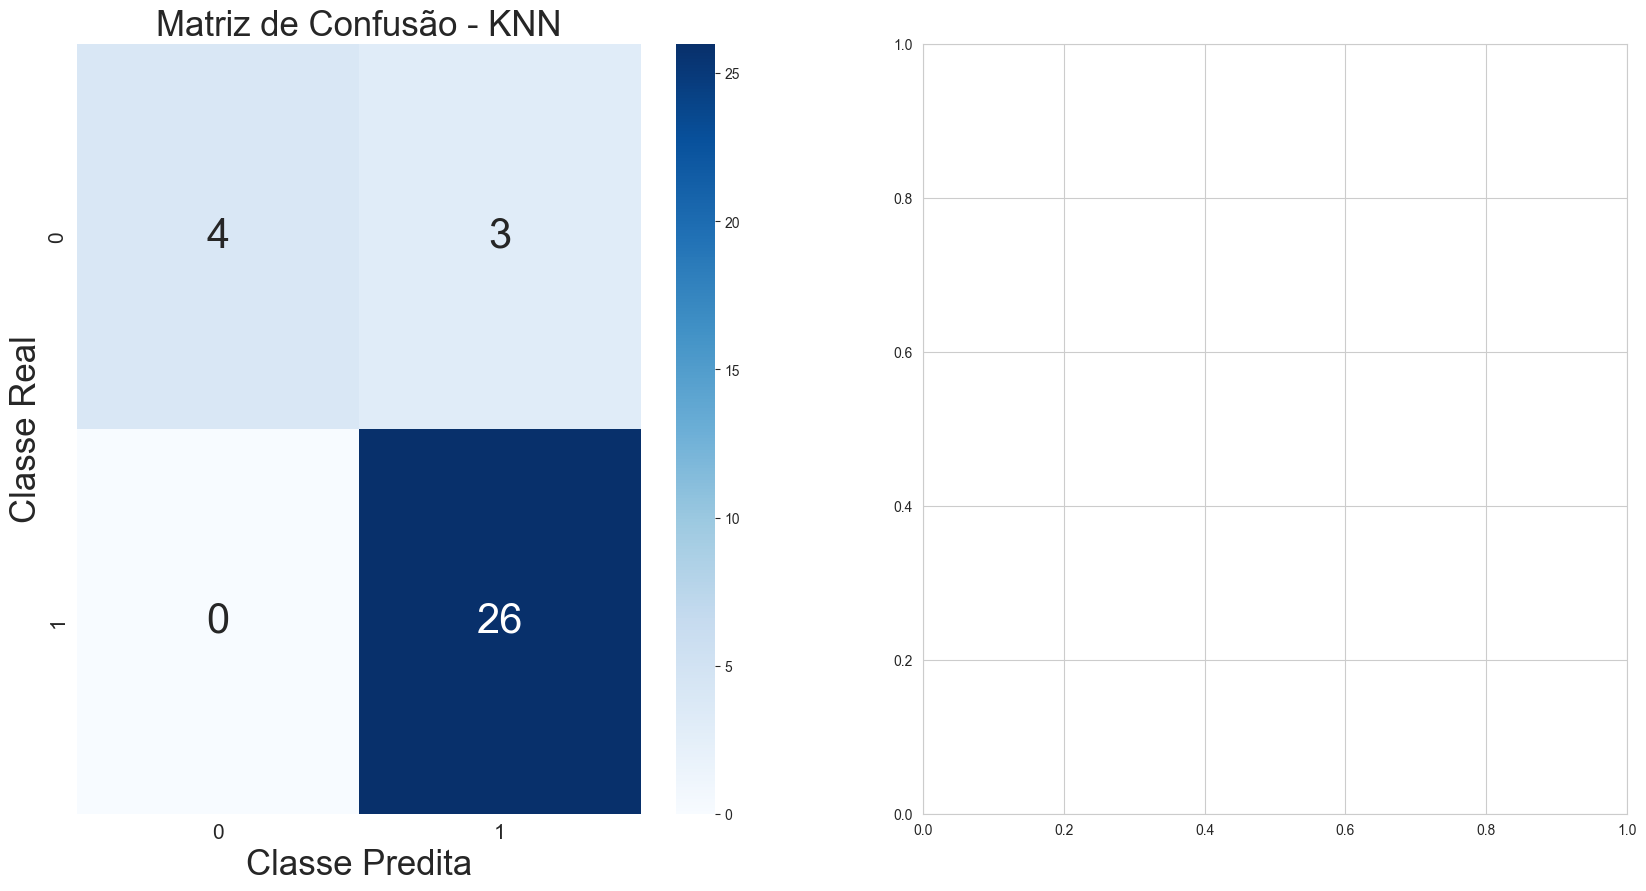

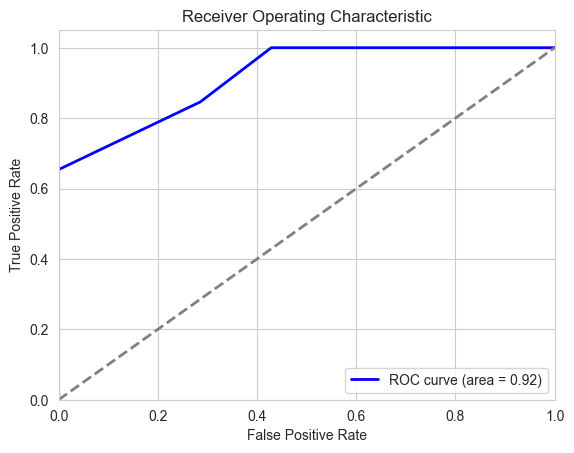

In [81]:

# KNN

from sklearn.model_selection import train_test_split  # Importa a função para dividir o conjunto de dados
from sklearn.preprocessing import StandardScaler  # Importa a função para normalizar os dados
from sklearn.neighbors import KNeighborsClassifier  # Importa o classificador KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, \
    roc_auc_score, roc_curve, f1_score  # Importa métricas para avaliação

# Assume que a última coluna é a coluna alvo
X = data2.iloc[:, :-1].values  # todas as colinas menos a ultima, como variaveis independentes
y = data2.iloc[:, -1].values  # seleciona a ultima coluna como variavel dependente (alvo)

# Divide os dados em conjuntos de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza os dados (opcional, mas recomendado para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta o normalizador
X_test = scaler.transform(X_test)  # Transforma os dados de teste com o mesmo normalizador

# Cria e treina o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors é o valor de K
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)  # previsoes com os dados de teste

# Avalia a precisão do modelo
accuracy_knn = accuracy_score(y_test, y_pred) * 100  # Converte para porcentagem
print(f'Acurácia do modelo KNN: {accuracy_knn:.2f}%')

# Calcula a precisão (precision) 
precision_knn = precision_score(y_test, y_pred, average='binary') * 100
print(f'Precisão do modelo KNN: {precision_knn:.2f}')

# Calcula o recall (sensibilidade)
recall_knn = recall_score(y_test, y_pred, average='binary') * 100
print(f'Recall (Sensibilidade) do modelo KNN: {recall_knn:.2f}%')

# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)  # calculo da matriz

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(conf_matrix_knn, annot=True, ax=axes[0], cmap='Blues', annot_kws={"size": 30})  # desenho da matriz
axes[0].set_title('Matriz de Confusão - KNN', fontsize=25)
axes[0].set_xlabel('Classe Predita', fontsize=25)
axes[0].set_ylabel('Classe Real', fontsize=25)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Calcula o F1-Score
knn_f1 = f1_score(y_test, y_pred, average='binary') * 100
print(f'F1-Score do modelo KNN: {knn_f1:.2f}%')

# Relatório de Classificação
class_report_knn = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report_knn)

# ROC e AUC (apenas para problemas binários)
if len(set(y)) == 2:  # Verifica se é um problema binário
    y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
    auc_knn = roc_auc_score(y_test, y_prob)  # calcula a AUC
    print(f'AUC: {auc_knn:.2f}')

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calcula a curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_knn:.2f})')  # desenha acurva ROC
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # linha de referencia
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')  # eixo do x
    plt.ylabel('True Positive Rate')  # eixo do y
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Acurácia do modelo de Árvore de Decisão: 100.00%
Precisão do modelo de Árvore de Decisão: 100.00%
Recall (Sensibilidade) do modelo de Árvore de Decisão: 100.00%
F1-Score do modelo KNN: 100.00%
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         7
        True       1.00      1.00      1.00        26

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

AUC: 1.00


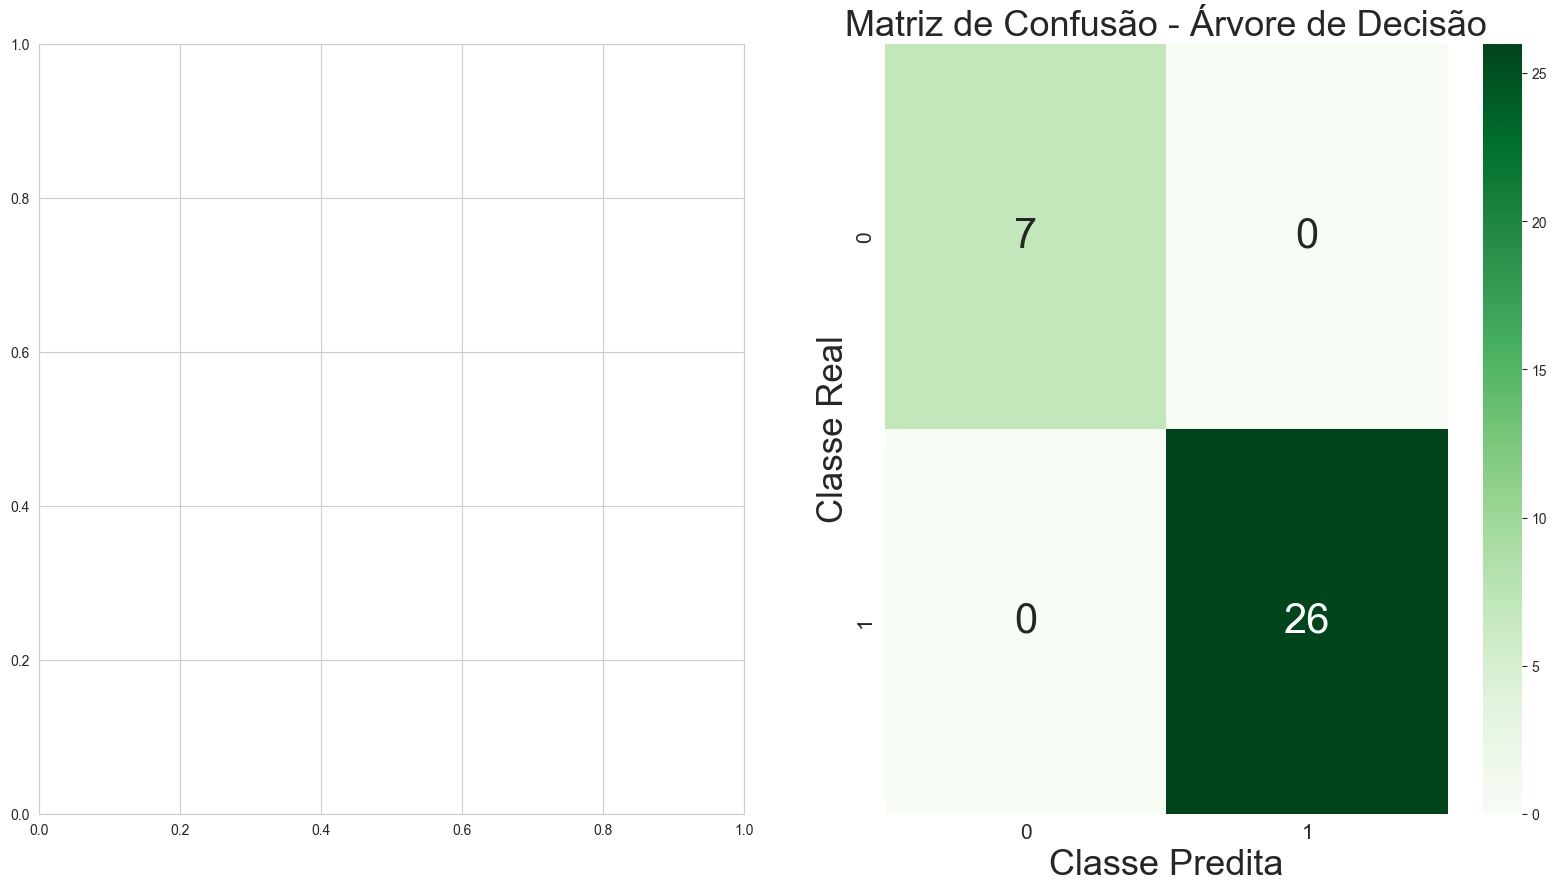

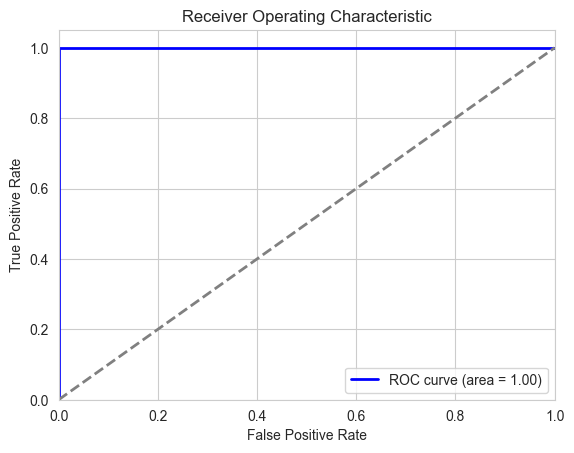

In [82]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # importa o classificador da Árvore de decisão

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Normaliza os dados (opcional, mas pode ajudar em alguns modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # ajusta o normalizador
X_test = scaler.transform(X_test) # transforma os dados de teste com o normalizador

# Cria e treina o modelo de Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_dt = dt.predict(X_test) 

# Avalia a precisão do modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100  # Converte para porcentagem
print(f'Acurácia do modelo de Árvore de Decisão: {accuracy_dt:.2f}%')

# Calcula a precisão (precision) e o recall (sensibilidade)
precision_dt = precision_score(y_test, y_pred_dt, average='binary') * 100  # Converte para porcentagem
print(f'Precisão do modelo de Árvore de Decisão: {precision_dt:.2f}%')

# Calcula a precisão (precision) e o recall (sensibilidade)
recall_dt = recall_score(y_test, y_pred_dt, average='binary') * 100  # Converte para porcentagem
print(f'Recall (Sensibilidade) do modelo de Árvore de Decisão: {recall_dt:.2f}%')

# Matriz de Confusão
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
#print(conf_matrix)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[1], cmap='Greens', annot_kws={"size": 30}) # desenho da matriz
axes[1].set_title('Matriz de Confusão - Árvore de Decisão', fontsize=26)
axes[1].set_xlabel('Classe Predita', fontsize=26)
axes[1].set_ylabel('Classe Real', fontsize=25)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

# Calcula o F1-Score
dt_f1 = f1_score(y_test, y_pred_dt, average='binary') * 100
print(f'F1-Score do modelo KNN: {dt_f1:.2f}%')

#Relatório de Classificação
class_report_dt = classification_report(y_test, y_pred_dt)
print("Relatório de Classificação:")
print(class_report_dt)

# ROC e AUC (apenas para problemas binários)
if len(set(y)) == 2:  # Verifica se é um problema binário
    y_prob = dt.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
    auc_dt = roc_auc_score(y_test, y_prob) # calculo da AUC
    print(f'AUC: {auc_dt:.2f}')

    fpr, tpr, thresholds = roc_curve(y_test, y_prob) # calcula a curva ROC
    plt.figure() # nova figura
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate') # eixo x
    plt.ylabel('True Positive Rate') # eixo y
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Curva de Aprendizagem


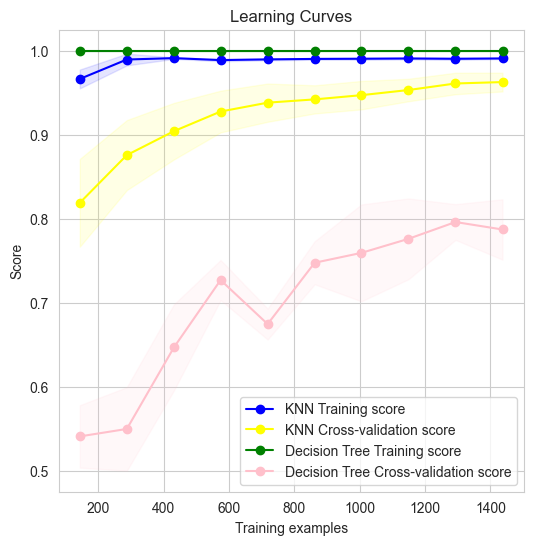

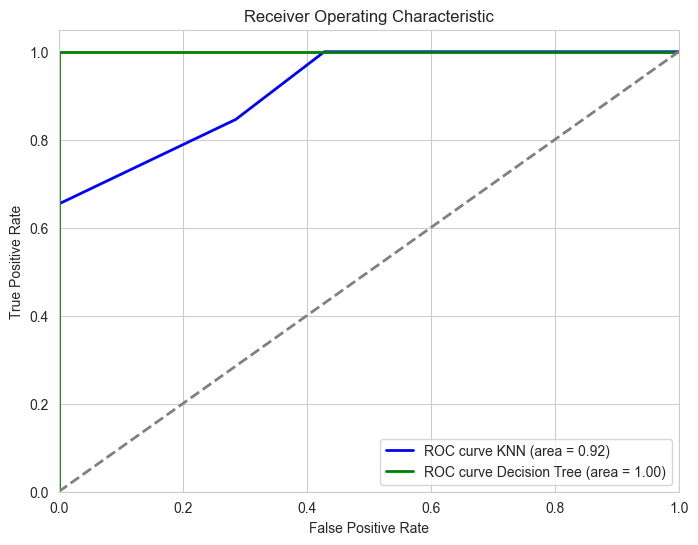

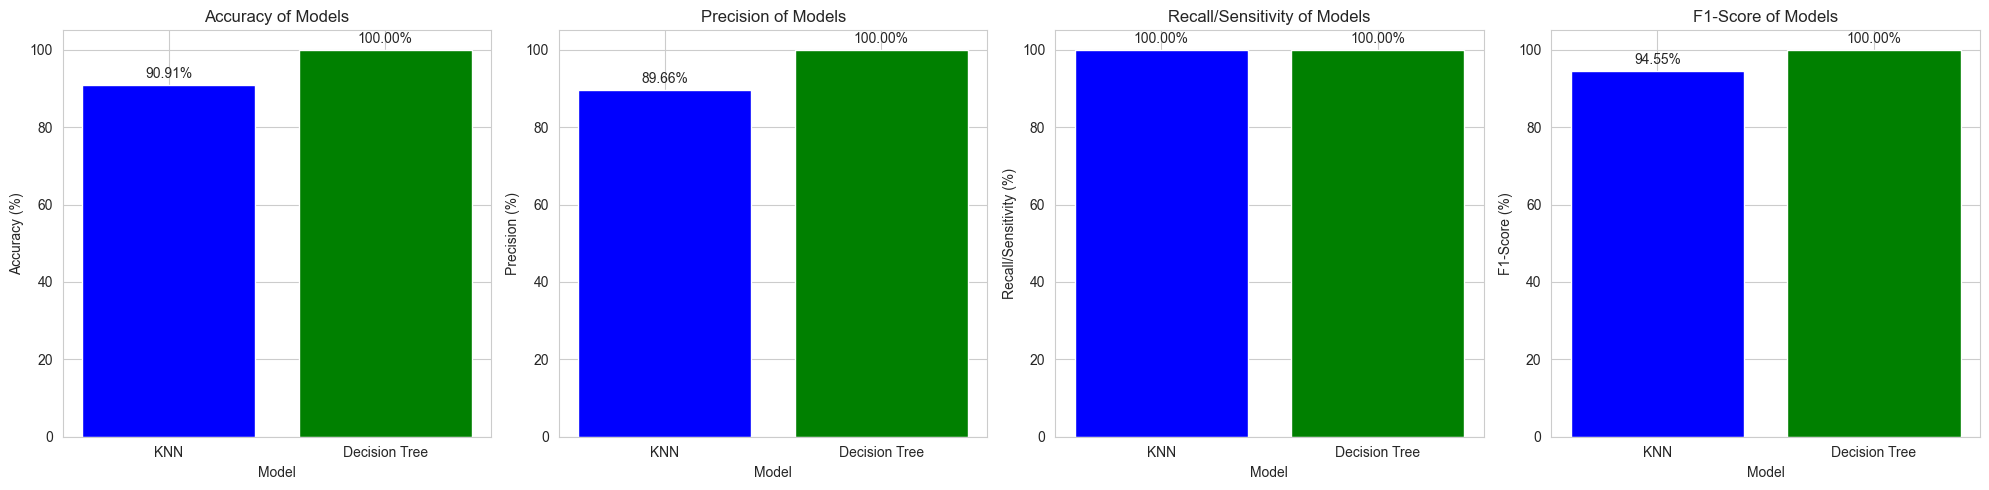

,Accuracy (%),Precision (%),Recall/Sensitivity (%),F1-Score (%)
Modelo,,,,
KNN,90.909091,89.655172,100.0,94.545455
Decision Tree,100.000000,100.000000,100.0,100.000000


In [83]:
# COMPARACAO DOS DOIS MODELOS

from sklearn.model_selection import learning_curve # calcula as curvas de aprendizagem
from sklearn.model_selection import StratifiedKFold # avaliacao das curvas de aprendizagem - validacao cruzada
from sklearn.neighbors import KNeighborsClassifier # classificador KNN
from sklearn.tree import DecisionTreeClassifier # classificador da Arvore de decisao
from sklearn.datasets import load_digits # carrega o conjunto de dados

print('Curva de Aprendizagem') # Variacao da acurácia com o tamanho do conjunto de treinamento


# Carregar o conjunto de dados (como exemplo, usaremos o conjunto de dados de dígitos)
X, y = load_digits(return_X_y=True)

# Definir modelos que você deseja avaliar (KNN e Árvore de Decisão)
models = {'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier()}

# Definir os tamanhos dos conjuntos de treinamento para a curva de aprendizado
train_sizes = np.linspace(0.1, 1.0, 10)

# Configurar a validação cruzada k-fold
cv = StratifiedKFold(n_splits=5)

# Plotar a curva de aprendizado para cada modelo
plt.figure(figsize=(6, 6))

colors = {'KNN': {'Training': 'blue', 'Cross-validation': 'yellow'},
          'Decision Tree': {'Training': 'green', 'Cross-validation': 'pink'}}

# gera a curva de aprendizagem para os modelos 
for model_name, model in models.items():
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # areas de variancia
    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color=colors[model_name]['Training'])
    plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=colors[model_name]['Cross-validation'])
    
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color=colors[model_name]['Training'], label=f"{model_name} Training score")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color=colors[model_name]['Cross-validation'], label=f"{model_name} Cross-validation score")

# configuracoes do grafico
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Desenha as curvas ROC para KNN e Árvore de Decisão juntas
plt.figure(figsize=(8, 6))

# Desenha curva ROC para KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve KNN (area = {auc_knn:.2f})')

# Desenha curva ROC para Árvore de Decisão
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve Decision Tree (area = {auc_dt:.2f})')

# Desenha linha de referência
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# configuracoes do grafico
plt.xlim([0.0, 1.0]) # limites
plt.ylim([0.0, 1.05]) # limites
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Desenho histogramas para Acurácia, Precisão, Recall/Sensibilidade e F1-Score em uma linha
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Histograma para Acurácia
axs[0].bar(['KNN', 'Decision Tree'], [accuracy_knn, accuracy_dt], color=['blue', 'green'])
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Accuracy of Models')
# Adicionar porcentagem nas barras
for i, v in enumerate([accuracy_knn, accuracy_dt]):
    axs[0].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Histograma para Precisão
axs[1].bar(['KNN', 'Decision Tree'], [precision_knn, precision_dt], color=['blue', 'green'])
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Precision (%)')
axs[1].set_title('Precision of Models')
# Adicionar porcentagem nas barras
for i, v in enumerate([precision_knn, precision_dt]):
    axs[1].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Histograma para Recall/Sensibilidade
axs[2].bar(['KNN', 'Decision Tree'], [recall_knn, recall_dt], color=['blue', 'green'])
axs[2].set_xlabel('Model')
axs[2].set_ylabel('Recall/Sensitivity (%)')
axs[2].set_title('Recall/Sensitivity of Models')
# Adicionar porcentagem nas barras
for i, v in enumerate([recall_knn, recall_dt]):
    axs[2].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Histograma para F1-Score
axs[3].bar(['KNN', 'Decision Tree'], [knn_f1, dt_f1], color=['blue', 'green'])
axs[3].set_xlabel('Model')
axs[3].set_ylabel('F1-Score (%)')
axs[3].set_title('F1-Score of Models')
# Adicionar porcentagem nas barras
for i, v in enumerate([knn_f1, dt_f1]):
    axs[3].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Criar DataFrame com os valores das métricas
tabela = {
    'Modelo': ['KNN', 'Decision Tree'],
    'Accuracy (%)': [accuracy_knn, accuracy_dt],
    'Precision (%)': [precision_knn, precision_dt],
    'Recall/Sensitivity (%)': [recall_knn, recall_dt],
    'F1-Score (%)': [knn_f1, dt_f1]
}

# Criar DataFrame
tabela_metrics = pd.DataFrame(tabela)

# Definir as métricas como índices
tabela_metrics.set_index('Modelo', inplace=True)

# Exibir a tabela
tabela_metrics